In [1]:
# import libraries
import matplotlib.pyplot as plt
from openpile.construct import Pile, SoilProfile, Model, Layer
from openpile.soilmodels import API_sand, API_clay
from openpile.utils.py_curves import api_sand
from openpile.analyses import simple_winkler_analysis

In [5]:

from openpile.construct import Pile, SoilProfile, Model, Layer
from openpile.soilmodels import API_sand, API_clay

# Create a 40m deep offshore Soil Profile with a 15m water column
sp = SoilProfile(
    name="Offshore Soil Profile",
    top_elevation=0,
    water_elevation=15,
    layers=[
        Layer(
            name='Layer 1 - medium dense sand',
            top=0,
            bottom=-20,
            weight=18,
            lateral_model= API_sand(phi=33, Neq=100)
        ),
        Layer(
            name='Layer 2 - Firm clay',
            top=-20,
            bottom=-40,
            weight=18,
            lateral_model= API_clay(Su=[50, 70], eps50=0.015, Neq=100)
        ),
    ]
)

print(sp)

Layer 1
------------------------------
Name: Layer 1 - medium dense sand
Elevation: (0.0) - (-20.0) m
Weight: 18.0 kN/m3
Lateral model: 	API sand
	phi = 30.0°
	Cyclic, N = 100 cycles
Axial model: None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Layer 2
------------------------------
Name: Layer 2 - Firm clay
Elevation: (-20.0) - (-40.0) m
Weight: 18.0 kN/m3
Lateral model: 	API clay
	Su = 50.0-70.0 kPa
	eps50 = 0.015
	Cyclic, N = 100 cycles
Axial model: None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



In [11]:
# Create Model 
M = Model.create(name="", pile=p, soil=sp)

# create point load
M.set_support(elevation=-30, Tx = True)
M.set_support(elevation=0, Rz = True)
M.set_pointdisplacement(elevation=0, Ty=0.1)
M.set_pointload(elevation=0,Px=-20000)


In [12]:
result = simple_winkler_analysis(model=M)

Converged at iteration no. 2


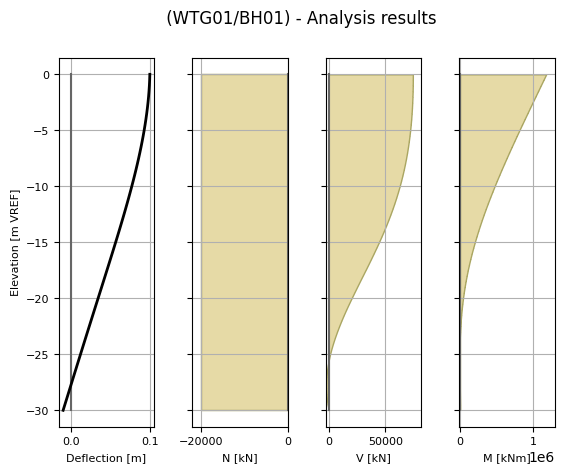

In [13]:
result.plot()

In [6]:
from openpile.construct import Layer
from openpile.soilmodels import API_clay
    
# Create a layer
layer1 = Layer(name='Soft Clay',
               top=0,
               bottom=-10,
               weight=18,
               lateral_model=API_clay(Su=[30,35], eps50=[0.01, 0.02], Neq=100), )

print(layer1)

Name: Soft Clay
Elevation: (0.0) - (-10.0) m
Weight: 18.0 kN/m3
Lateral model: 	API clay
	Su = 30.0-35.0 kPa
	eps50 = 0.01-0.02
	Cyclic, N = 100 cycles
Axial model: None


In [7]:
M.global_restrained

,x [m],y [m],Tx,Ty,Rz
Node no.,,,,,
0,0.0,0.0,False,True,True
1,-0.5,0.0,False,False,False
2,-1.0,0.0,False,False,False
3,-1.5,0.0,False,False,False
4,-2.0,0.0,False,False,False
...,...,...,...,...,...
56,-28.0,0.0,False,False,False
57,-28.5,0.0,False,False,False
58,-29.0,0.0,False,False,False


Text(0.5, 0, 'y [m]')

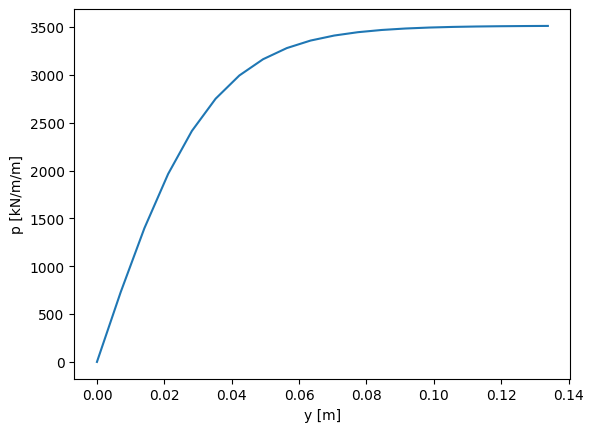

In [3]:
import matplotlib.pyplot as plt
from openpile.utils.py_curves import api_sand

p, y = api_sand(sig=50, # vertical stress in kPa 
                X = 5, # depth in meter
                phi = 35, # internal angle of friction 
                D = 5, # the pile diameter
                below_water_table=True,
                Neq=1, # static curve
                )

plt.plot(y,p)
plt.ylabel('p [kN/m/m]')
plt.xlabel('y [m]')